# 0.-Data Loading

In [1]:
import os
import pandas as pd

df = pd.read_csv('emi_ml_i.csv', sep = '|')
df.head()

,Unnamed: 0,esp,esp_24,esp_48,esp_daily_24,co2_24,co2_48,mibgas,mibgas_24,Nuclear,Solar termica,Eolica,Solar fotovoltaica,Demanda programada PBF total
0,2016-01-08 00:00:00,24.36,14.1,18.11,28.450417,7.54,7.74,18.75,19.0,6100.4,0.0,12911.8,4.2,26540.0
1,2016-01-08 01:00:00,19.33,8.0,12.40,28.450417,7.54,7.74,18.75,19.0,6100.4,0.0,12736.1,4.2,24373.1
2,2016-01-08 02:00:00,16.10,5.4,7.88,28.450417,7.54,7.74,18.75,19.0,6100.4,0.0,12592.4,4.2,23096.7
3,2016-01-08 03:00:00,15.00,4.5,7.00,28.450417,7.54,7.74,18.75,19.0,6100.4,0.0,12395.6,4.2,22524.9
4,2016-01-08 04:00:00,15.00,4.0,6.50,28.450417,7.54,7.74,18.75,19.0,6100.4,0.0,12066.6,4.2,22387.3


# 1.- Some Data Exploration
## 1.1.- Temporal Series Representation

A deeper dive on the data we are working on

In [2]:
df.columns

Index(['Unnamed: 0', 'esp', 'esp_24', 'esp_48', 'esp_daily_24', 'co2_24',
       'co2_48', 'mibgas', 'mibgas_24', 'Nuclear', 'Solar termica', 'Eolica',
       'Solar fotovoltaica', 'Demanda programada PBF total'],
      dtype='object')

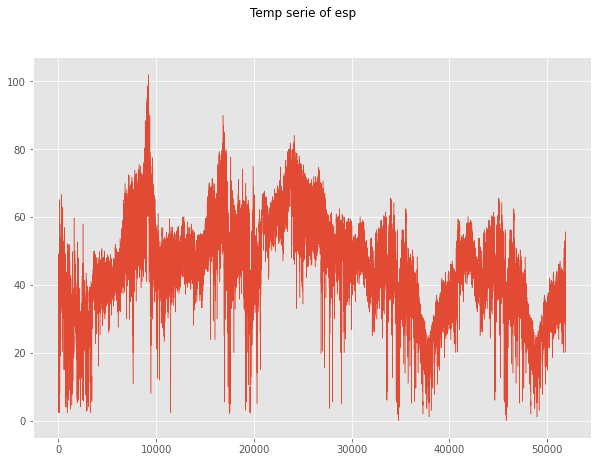

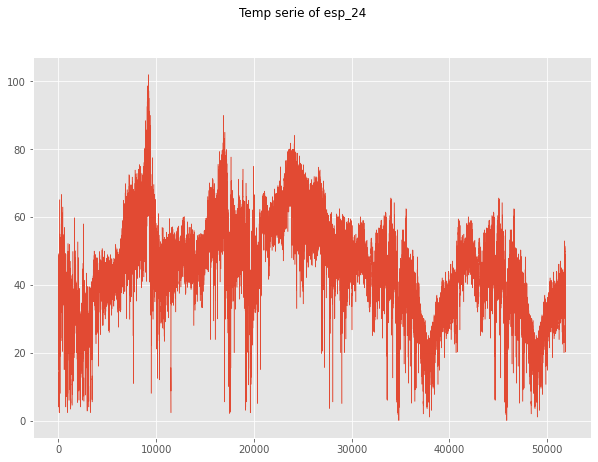

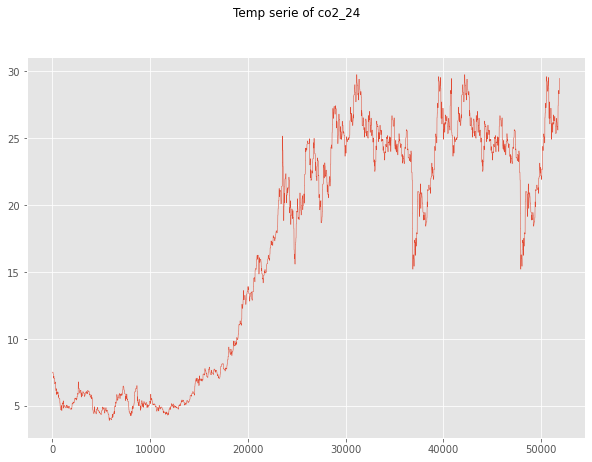

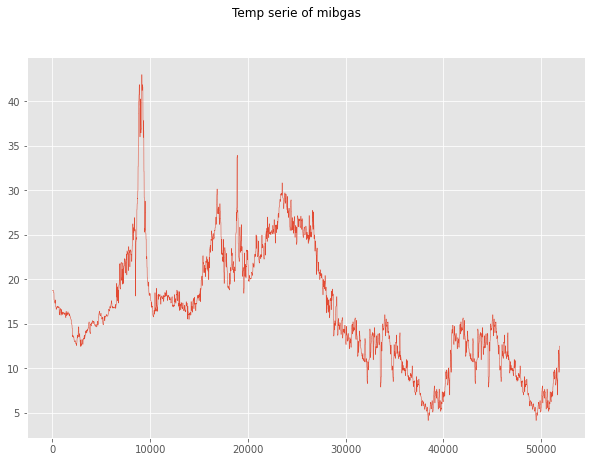

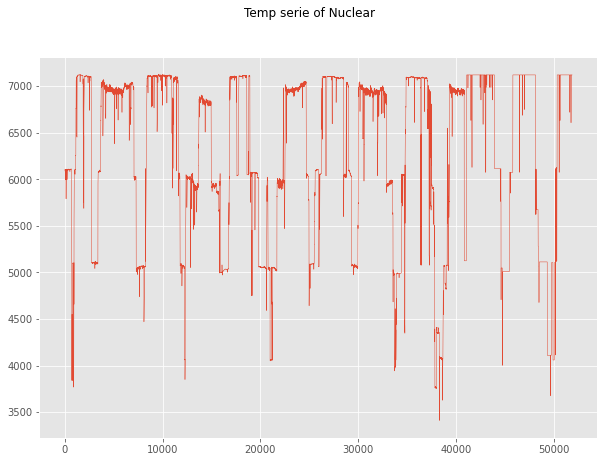

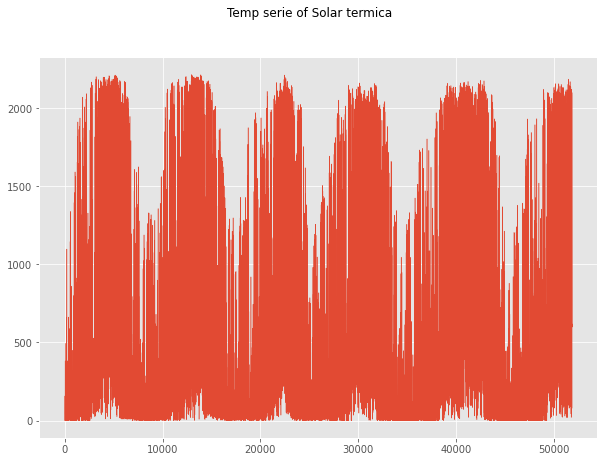

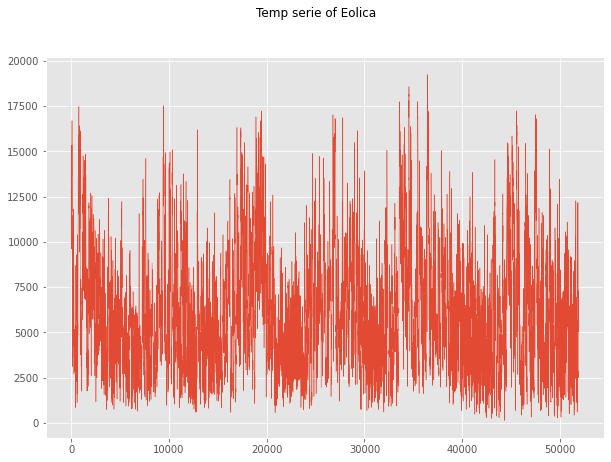

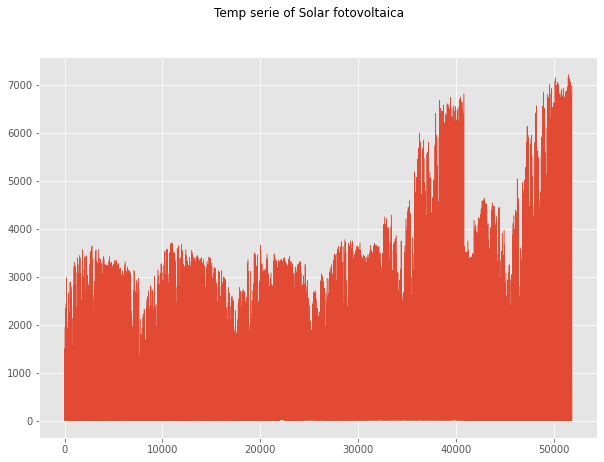

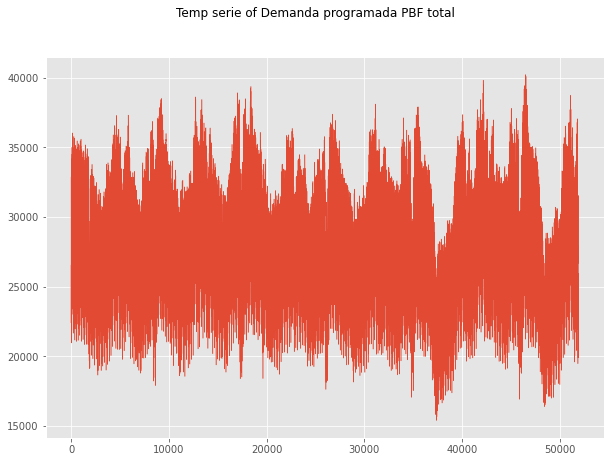

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 7]

for column in ['esp','esp_24', 'co2_24', 'mibgas', 'Nuclear',
       'Solar termica', 'Eolica', 'Solar fotovoltaica',
       'Demanda programada PBF total']:
    df[column].plot(linewidth  = 0.5)
    plt.suptitle("Temp serie of " + column)
    plt.show()
    

## 1.2.- Studying the response variable
Let us calculate some statistics and do some previous plotting over the response variable.

In [11]:
df['esp'].describe()

count    51888.000000
mean        44.616562
std         15.169664
min          0.030000
25%         35.257500
50%         45.250000
75%         54.470000
max        101.990000
Name: esp, dtype: float64

Text(0.5, 1.0, 'Energy Price Distribution')

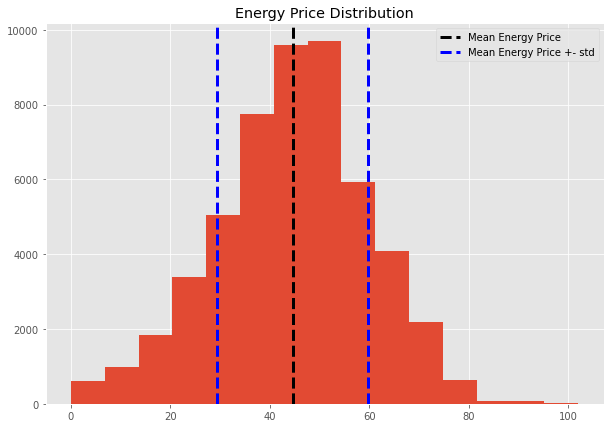

In [27]:
df['esp'].hist(bins = 15)
plt.axvline(df['esp'].mean(), color='k', linestyle='dashed', linewidth=3)
plt.axvline(df['esp'].mean() + df['esp'].std(), color='b', linestyle='dashed', linewidth=3)
plt.axvline(df['esp'].mean() - df['esp'].std(), color='b', linestyle='dashed', linewidth=3)
plt.legend(['Mean Energy Price', 'Mean Energy Price +- std'])
plt.title('Energy Price Distribution')

In [28]:
df['esp'].kurt(), df['esp'].skew()

(0.051568697694510224, -0.19941840642302242)

AS we can see we are working on a rather normal distributed variable with not much outliers neither not to sharpen which is confirmed by the low values of kurtosis and skewness.

### 1.1.1.- Movin averages calculations
Pandas package has some nice features to obtain in an easy and fast way the values from moving averages. This is a very important feature since this is used as an investment strategy by some people even now. Just because we know the data changes on an hourly basis we need to multiply the number of days we want to calculate the moving average and the number of hours a day we have (24). In order to plot these result we will create a new df.

In [36]:
df['esp_mm_7_days']  = df['esp'].rolling(window =  7  * 24).mean() 
df['esp_mm_14_days'] = df['esp'].rolling(window = 14 * 24).mean() 
df['esp_mm_60_days'] = df['esp'].rolling(window = 60  * 24).mean()
# df.head(7*25)

In [34]:
df_plot = df[['Unnamed: 0', 'esp', 'esp_24', 'esp_48', 'esp_daily_24','esp_mm_7_days', 'esp_mm_14_days', 'esp_mm_60_days']]

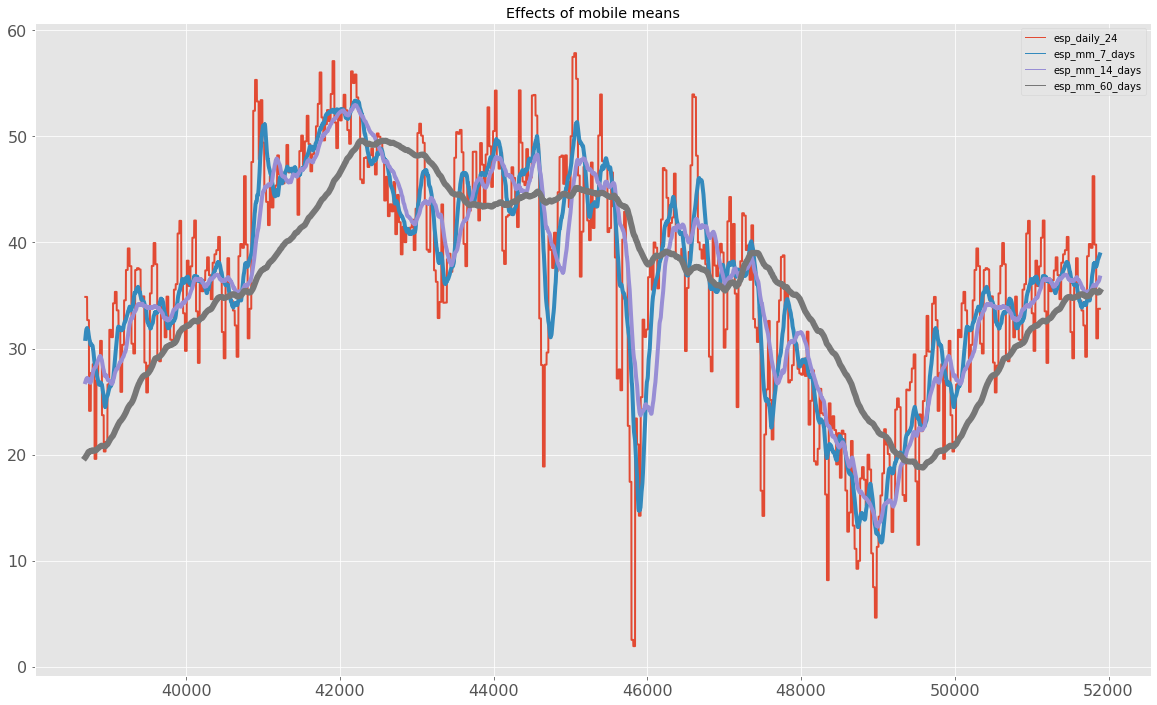

In [38]:
%matplotlib inline   
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 18, 8

fig, ax = plt.subplots()
df_plot[['esp_daily_24', 'esp_mm_7_days', 'esp_mm_14_days', 'esp_mm_60_days']].iloc[-550*24:].plot(figsize=(20,12), 
            title="Effects of mobile means", lw=1, fontsize=16, ax=ax, grid=True)

for line in ax.get_lines():
    if line.get_label() == 'esp_mm_60_days':
        line.set_linewidth(6)
    if line.get_label() == 'esp_mm_14_days':
        line.set_linewidth(4)
    if line.get_label() == 'esp_mm_7_days':
        line.set_linewidth(4)
    if line.get_label() == 'esp_daily_24':
        line.set_linewidth(2)
plt.show()


We can see that the longer time we are calculating the moving average, the softer the function is. Depending on the period, when a line crosses over another it is a good choice selling that value or on the contrary, buying that value when we are on the other case. We have represented 550 days, which is a year and a half of data.